In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import csv datas 
data1_castelmassa = pd.read_csv('Dati_po/Castelmassa.csv',sep=';',low_memory=False)
#Remove undesired columns
data1_castelmassa.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data1_castelmassa.rename(columns={'Castelmassa SIAP - Livello Idrometrico - 15968 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN


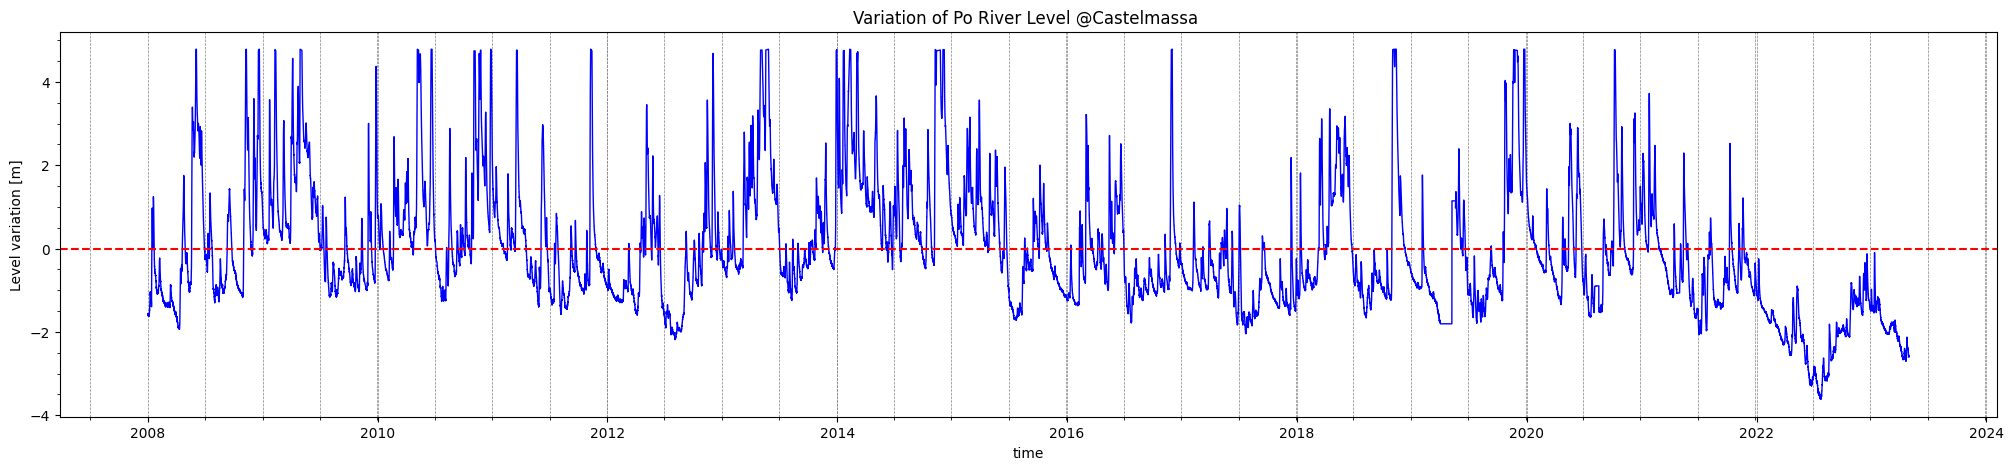

In [4]:
data1_castelmassa.dropna(inplace=True)
data1_castelmassa = data1_castelmassa.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data1_castelmassa.describe()
#In case it gives error because of non numerical data
data1_castelmassa['Level'] = pd.to_numeric(data1_castelmassa['Level'], errors='coerce')
#Remove outliers
mean=np.mean(data1_castelmassa['Level'])
sigma = np.std(data1_castelmassa['Level'])

#Remove rows with z-score greater than 3
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']< mean+3*sigma]
#2121 vales are removed for castelmassa (original 131301)
#Now for smaller extremes
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']> mean-3*sigma]
#no extremes removed for castelmassa

#Obtain the delta Level-Mean
data1_castelmassa['Delta'] = data1_castelmassa['Level']-mean
De=data1_castelmassa['Delta']
De = De.reset_index(drop=True)

#Rename the time
data1_castelmassa['Orario'] = pd.to_datetime(data1_castelmassa['Orario'])
# Add a new column with the year extracted from the 'date' column
data1_castelmassa['Year'] = data1_castelmassa['Orario'].dt.year

#Plot result

plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Castelmassa ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


In [21]:
data1_castelmassa['month'] = [i.month for i in data1_castelmassa['Orario']]

                    Orario  Level Variazione  Valore assoluto     Delta  Year  \
0      2008-01-01 01:00:00   5.91       0.00             5.91 -1.566547  2008   
1      2008-01-01 02:00:00   5.91       0.00             5.91 -1.566547  2008   
2      2008-01-01 03:00:00   5.91       0.00             5.91 -1.566547  2008   
3      2008-01-01 04:00:00   5.91       0.00             5.91 -1.566547  2008   
4      2008-01-01 05:00:00   5.91       0.00             5.91 -1.566547  2008   
...                    ...    ...        ...              ...       ...   ...   
131496 2023-04-30 19:00:00   4.88       0.01             4.88 -2.596547  2023   
131497 2023-04-30 20:00:00   4.88       0.00             4.88 -2.596547  2023   
131498 2023-04-30 21:00:00   4.88       0.00             4.88 -2.596547  2023   
131499 2023-04-30 22:00:00   4.88       0.00             4.88 -2.596547  2023   
131500 2023-04-30 23:00:00   4.88       0.00             4.88 -2.596547  2023   

        month  
0          

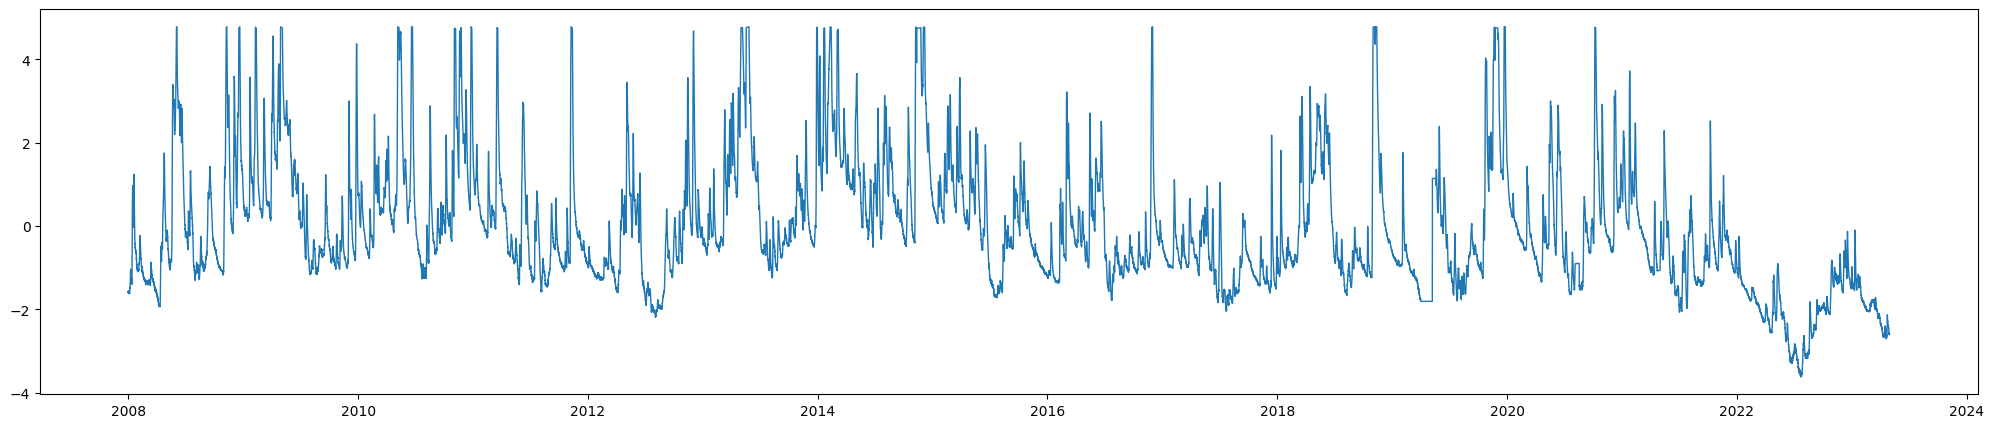

In [26]:
plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'], De, linewidth=1)


In [102]:
df = data1_castelmassa
df['date'] = pd.to_datetime(df['Orario'])  # Convert 'date' column to DateTime
monthly_avg = df.groupby([df['date'].dt.year, df['date'].dt.month])['Delta'].mean()
yearly_avg = monthly_avg.groupby(level=0).mean()

In [103]:
# Convert monthly_avg Series to a DataFrame
df = monthly_avg.rename_axis(['Year', 'Month']).reset_index(name='Average')
df['Year'] = df['Year'].astype(str)  # Convert 'Year' column to string
df['Month'] = df['Month'].astype(str)  # Convert 'Month' column to string
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], format='%Y-%m')

print(df)

     Year Month   Average       Date
0    2008     1 -0.677610 2008-01-01
1    2008     2 -1.054299 2008-02-01
2    2008     3 -1.337235 2008-03-01
3    2008     4 -0.632144 2008-04-01
4    2008     5  0.669555 2008-05-01
..    ...   ...       ...        ...
179  2022    12 -1.070055 2022-12-01
180  2023     1 -1.289074 2023-01-01
181  2023     2 -1.929612 2023-02-01
182  2023     3 -1.949679 2023-03-01
183  2023     4 -2.489450 2023-04-01

[184 rows x 4 columns]


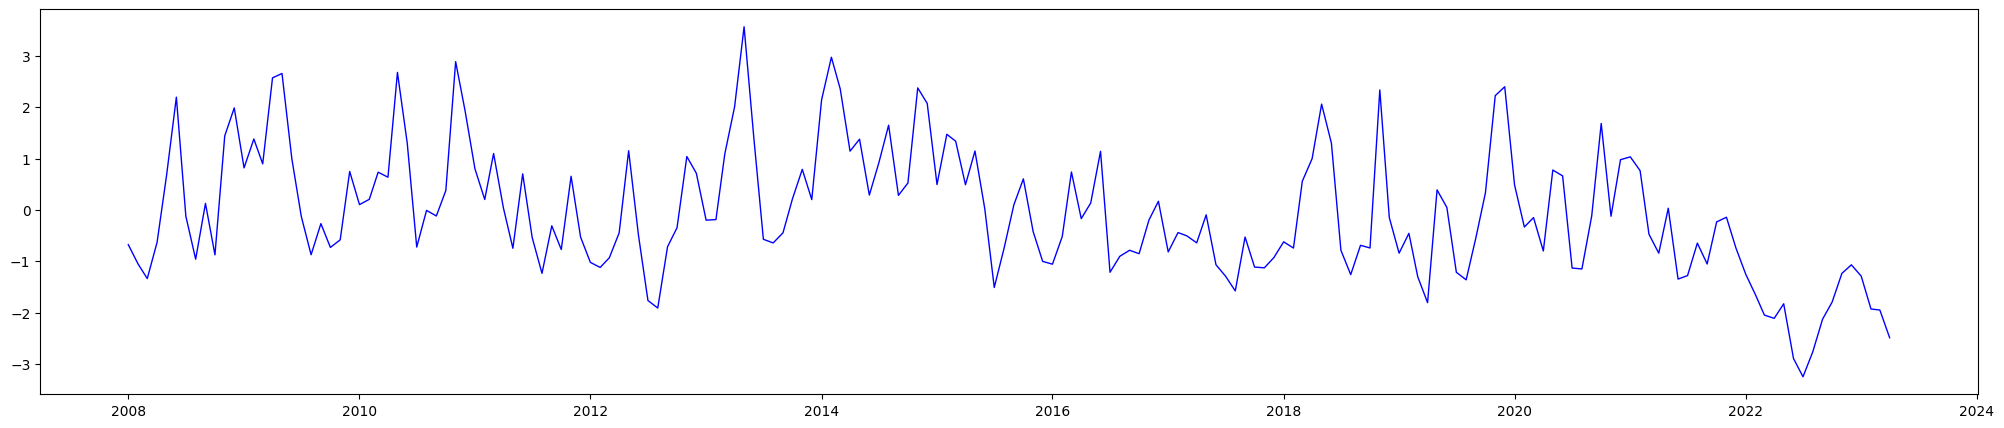

In [104]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)

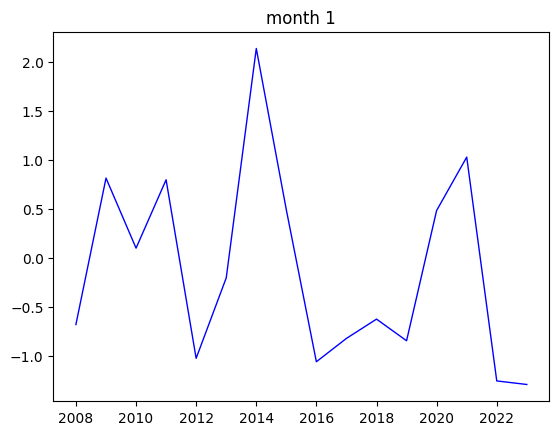

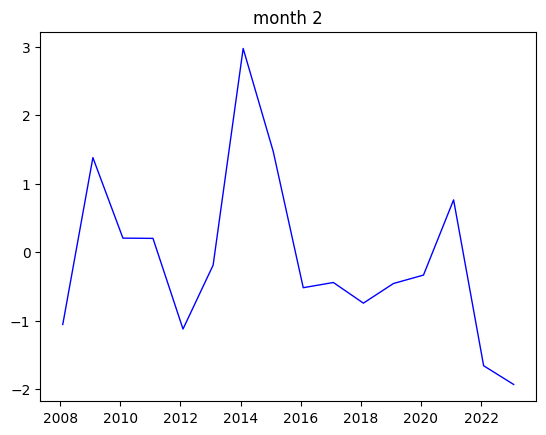

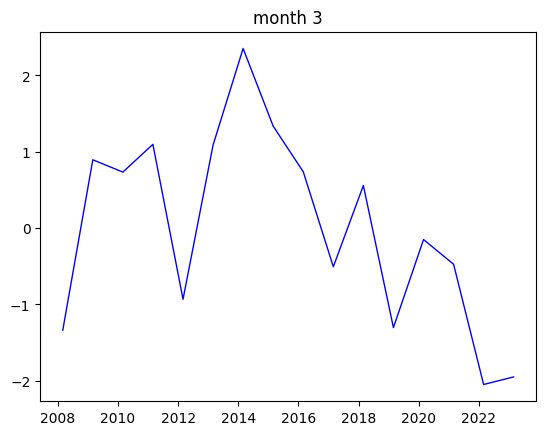

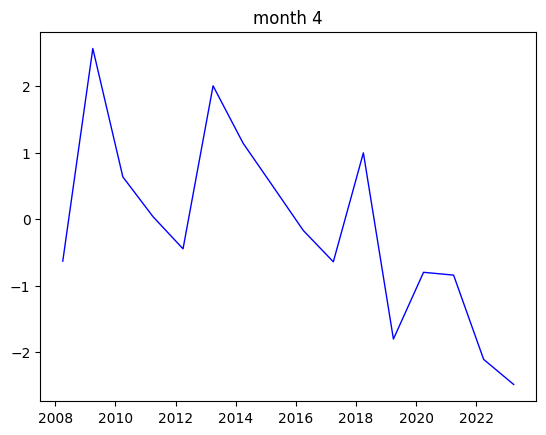

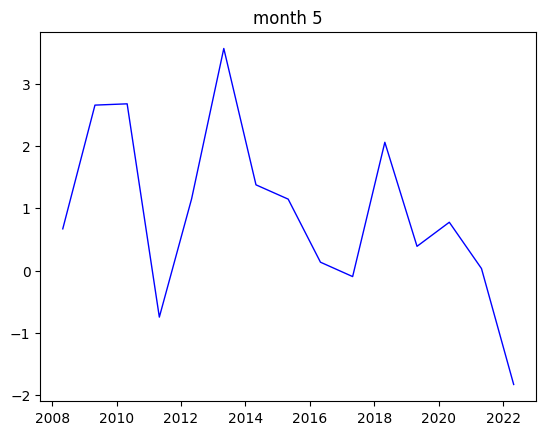

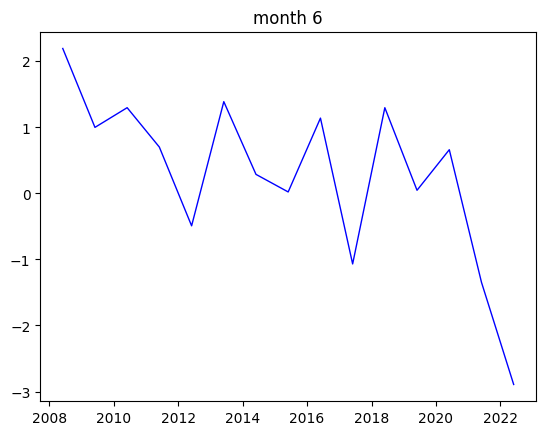

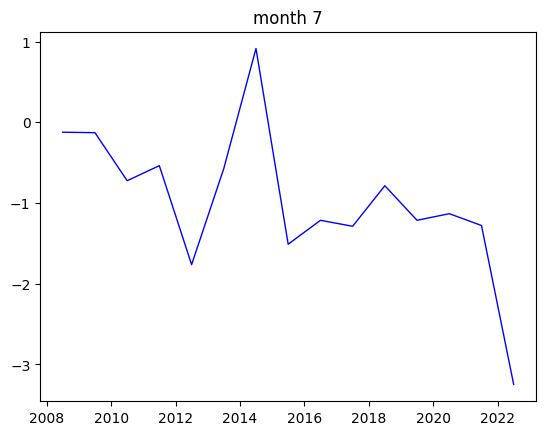

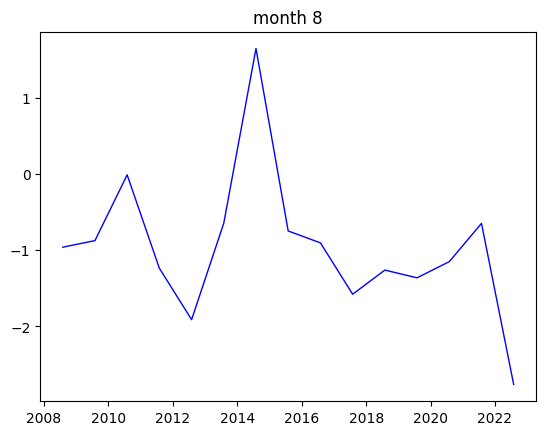

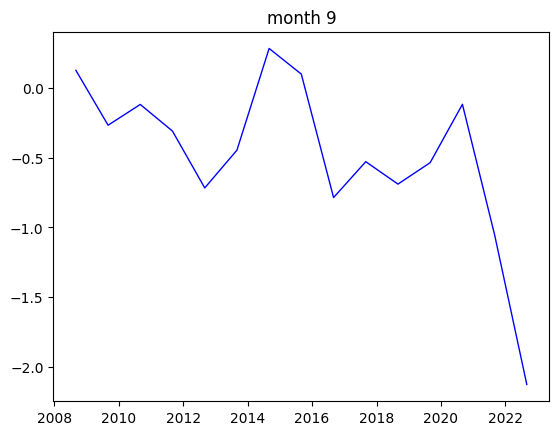

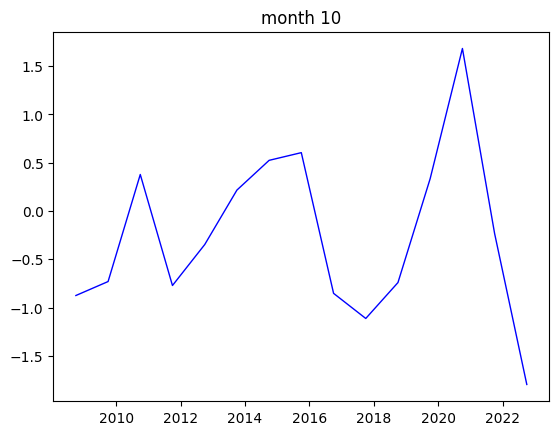

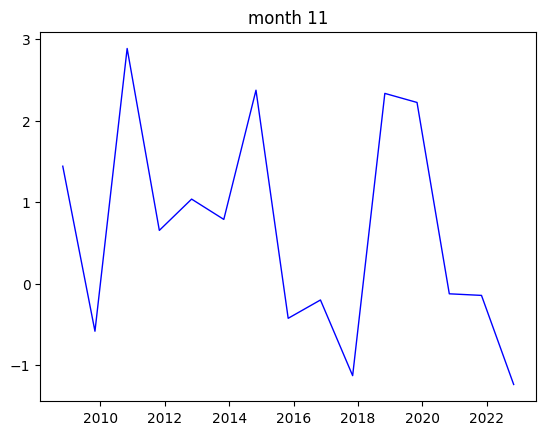

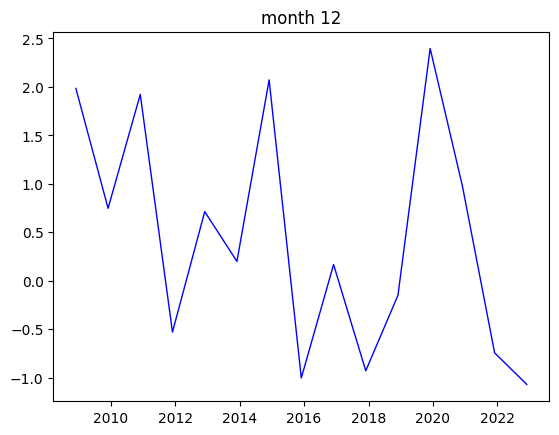

In [111]:
for i in range(1,13):
    indexes=np.where(np.int32(df['Month'])==i)[0]
    plt.plot(df['Date'][indexes],df['Average'][indexes],color='blue', linewidth=1)
    plt.title('month ' + str(i))
    plt.show()